In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv('covid-19(india).csv')


In [14]:
data=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
data

,Date,Infected
0,03-02-2020,3
1,02-03-2020,2
2,03-03-2020,2
3,04-03-2020,20
4,05-03-2020,1
5,06-03-2020,2
6,07-03-2020,3
7,08-03-2020,5
8,09-03-2020,7
9,10-03-2020,11


In [15]:
data['yaxis']=data['Infected'].cumsum()
data

,Date,Infected,yaxis
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
5,06-03-2020,2,30
6,07-03-2020,3,33
7,08-03-2020,5,38
8,09-03-2020,7,45
9,10-03-2020,11,56


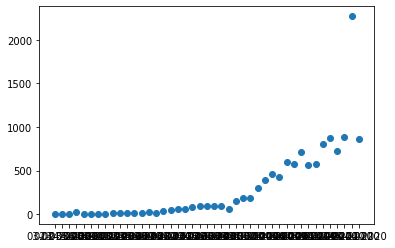

In [16]:
plt.scatter(data['Date'], data['Infected'])

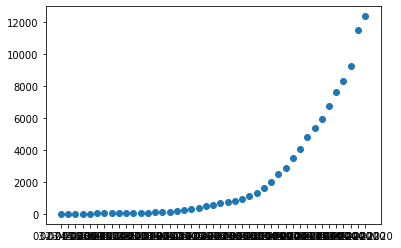

In [17]:
plt.scatter(data['Date'], data['yaxis'])


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


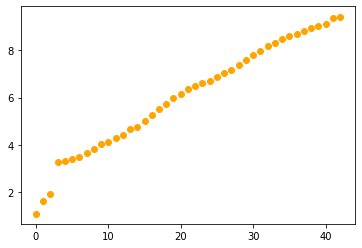

In [18]:
#applying regression model from here
#graph=data.iloc[1:]
graph=data
day=np.arange(0, len(graph), 1)
print(day)
plt.scatter(day, np.log(graph['yaxis']), color='orange')

In [19]:
X=day
Y=np.log(graph['yaxis'])

m=c=0 #m is slope and c is the y intercept of the line
L=0.001 #the learning rate
epochs = 100000  # The number of iterations to perform gradient descent
n=len(graph) #number of elements in training dataset

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X+ c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c

print(m)

0.18049991897425965


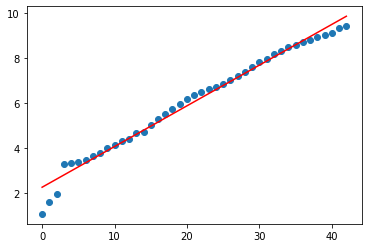

In [20]:
Y_pred = m*X+ c
plt.scatter(X, Y) 
prediction_space= ([min(X), max(X)])
plt.plot(prediction_space, [min(Y_pred), max(Y_pred)], color='red')

In [21]:
#test=np.arange(0, len(graph)+1, 1)
test=np.arange(len(graph)-1, len(graph)+11, 1)
pred=m*test+c
test, np.exp(pred)

(array([42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]),
 array([ 18933.45750288,  22678.79879475,  27165.0286111 ,  32538.70657438,
         38975.3841489 ,  46685.33969173,  55920.44798856,  66982.4086938 ,
         80232.60248813,  96103.89694172, 115114.78776664, 137886.33743534]))

In [22]:
1.0+m*14+m**2*24

4.308924163632779